In [1]:
library(lindia)
library(tidyverse)
library(caret)
library(sjPlot) #plot estimate
library(webshot)
#library(leaps)
#library(MASS)
#library(lme4) #random effect
library(lmerTest) #like lmer but with p-value
library(effects)#calculate and display model estimates
library(ggplot2)
library(pbkrtest) #backward test for glmer
library(DHARMa) #simulaed residual for glmer
library(Cairo)
library(cowplot) #several plot together

#install.packages("webshot")
library(DHARMa)
library(lindia)
library(modEvA)
library(dplyr)
library(lme4) #random effect
library(broom)
library(ggpubr) 
library(rstatix)
library(WRS2) #robust ancova
library(emmeans)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'sjPlot' was built under R version 4.0.4"
Warning message:
"package 'webshot' was built under R version 4.0.5"
Loading required package: lme4

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

 

In [2]:
#df_ = df[ which(df$PenID %in% c('pen3','pen4','pen5','pen10','pen11','pen12')), ]  

# Download data

In [6]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_/Adaptability'
df = read.csv(file.path(path_,'Adaptability_Stat.csv'), header = TRUE, sep = ";")
#df$'#of the first 3 days with 4 zone visited' = df$nbr_days_4zonevisited
#df$'mean % of time spent in lower perch' = df$mean_perc_duration_3_Zone
#df$'mean % of time spent in WG' = df$mean_percentage_time_outside_while_WG_open
df$Person_feather = as.factor(df$Person_feather)   
df$PenID = as.factor(df$PenID) 
print(dim(df))
summary(df)

[1] 79 22


 maxPododermatitis    severity       Feathers     Person_feather     weight    
 Min.   :  0.00    Min.   : 6.0   Min.   :35.00   Sabine:45      Min.   :1518  
 1st Qu.: 50.00    1st Qu.:24.0   1st Qu.:58.50   Satar :34      1st Qu.:1802  
 Median :100.00    Median :36.0   Median :66.33                  Median :1916  
 Mean   : 93.18    Mean   :35.9   Mean   :65.66                  Mean   :1912  
 3rd Qu.:125.00    3rd Qu.:45.0   3rd Qu.:73.50                  3rd Qu.:2020  
 Max.   :265.00    Max.   :84.0   Max.   :86.67                  Max.   :2304  
                                                                               
 mean_perc_duration_5_Zone mean_perc_duration_4_Zone mean_perc_duration_3_Zone
 Min.   : 2.745            Min.   : 3.167            Min.   : 2.104           
 1st Qu.:26.904            1st Qu.: 5.396            1st Qu.:11.837           
 Median :39.953            Median : 7.020            Median :16.674           
 Mean   :41.509            Mean   : 8.313   

# Linear mixed effect model

# check which variables to control for

Backward reduced random-effect table:

            Eliminated npar  logLik    AIC    LRT Df Pr(>Chisq)   
<none>                   11 -281.56 585.12                        
(1 | PenID)          0   10 -286.00 592.01 8.8804  1   0.002883 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Backward reduced fixed-effect table:
Degrees of freedom method: Satterthwaite 

               Eliminated  Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
RPen                    1   0.373   0.373     1 65.187  0.0038 0.9513
Treatment               2   2.790   2.790     1  6.055  0.0286 0.8713
CLASS                   3 201.389  50.347     4 67.009  0.5153 0.7247
Person_feather          4  62.878  62.878     1 70.750  0.6595 0.4195
InitWeight              5 206.710 206.710     1 72.160  2.1736 0.1447

Model found:
Feathers ~ (1 | PenID)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Feathers ~ (1 | PenID)
   Data: df

REML criterion at convergence: 591.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.39398 -0.64268 -0.04181  0.63809  2.21930 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 27.70    5.263   
 Residual             96.34    9.815   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   65.775      2.169  6.948   30.32 1.22e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


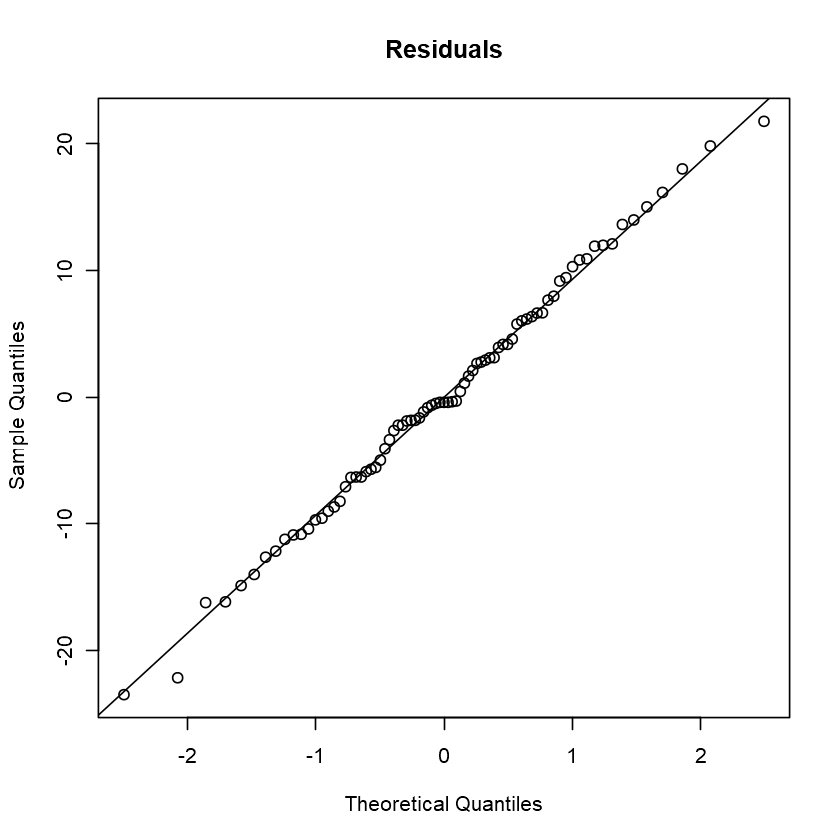

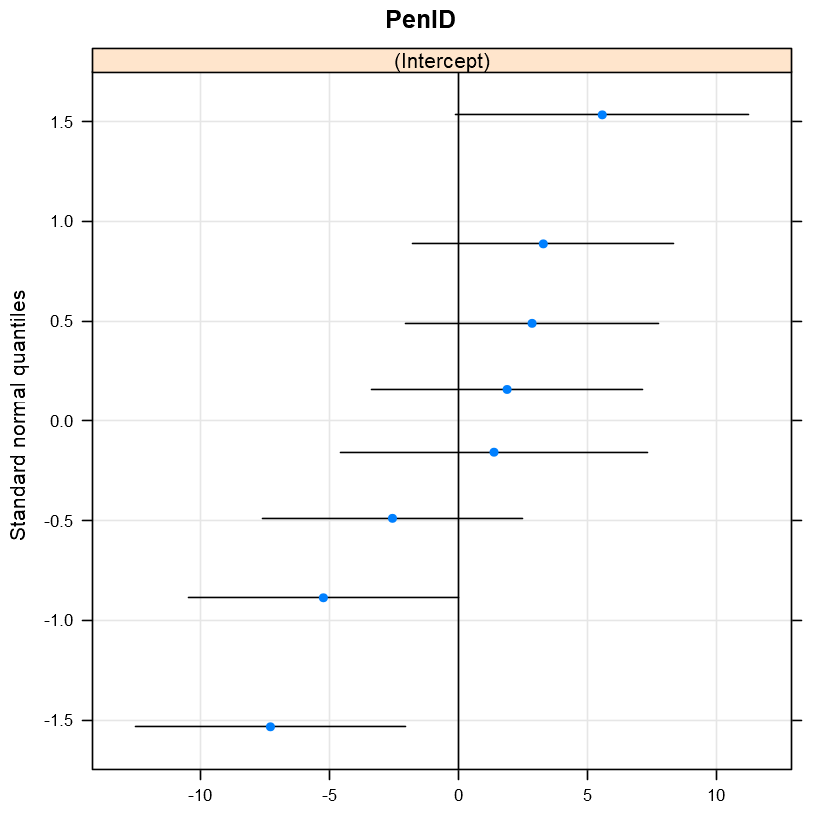

Warning message in min(new_value, na.rm = T):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in min(dat$conf.low):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in min(dat$estimate):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in max(dat$conf.high):
"aucun argument pour max ; -Inf est renvoyé"
Warning message in max(dat$estimate):
"aucun argument pour max ; -Inf est renvoyé"
Warning message in min(ticks):
"aucun argument trouvé pour min ; Inf est renvoyé"
Warning message in max(ticks):
"aucun argument pour max ; -Inf est renvoyé"
Warning message in rep(yes, length.out = len):
"'x' is NULL so the result will be NULL"
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: l'argument de remplacement est de longueur nulle

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in r

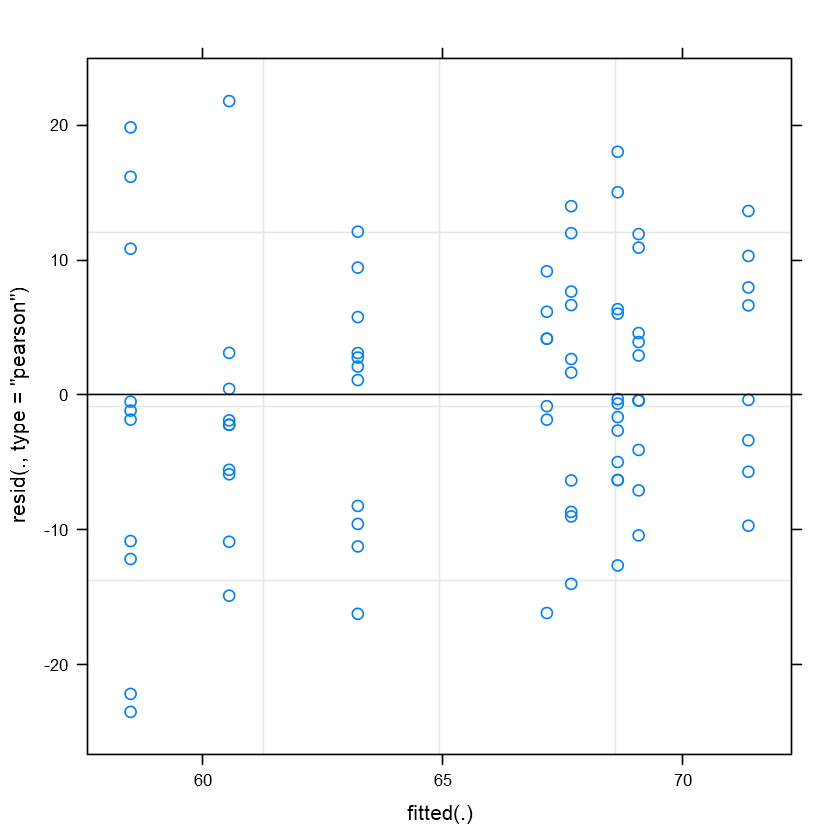

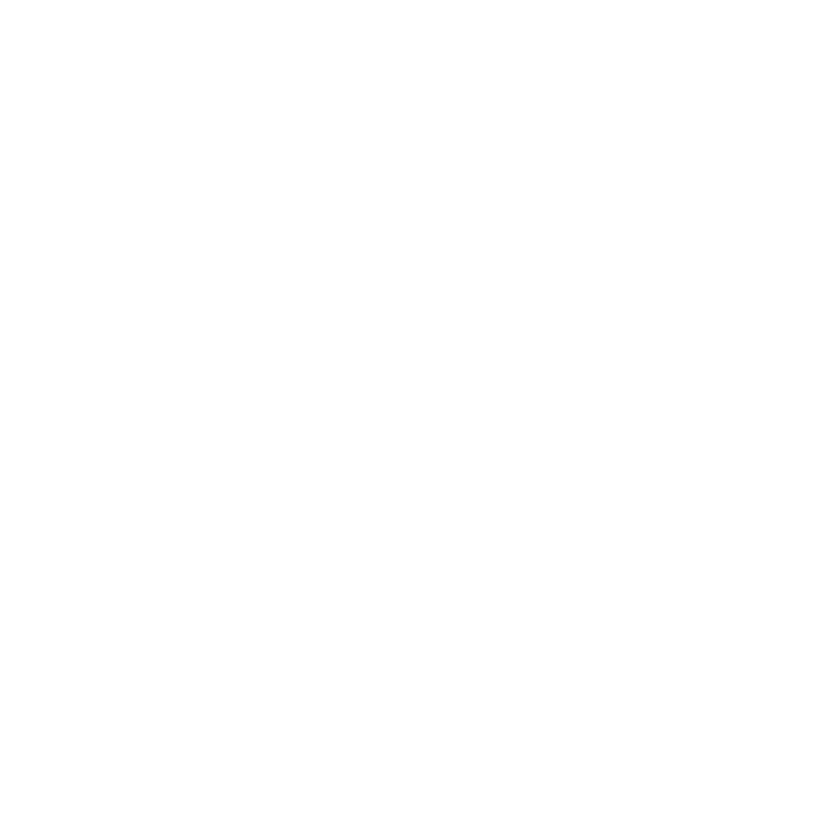

In [7]:
#FOR model PLOT in poster
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit_ = lmerTest::lmer(Feathers ~ Person_feather + RPen + CLASS + Treatment + InitWeight + (1|PenID), data=df)
# Backward elimination using terms with default alpha-levels:
step_res = step(fit_)
#show elimination results
step_res
fit = get_model(step_res)
fit_feather = fit

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

## Feather HA5

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_days_nomvt,11.002344,11.002344,1,69.66750,0.11964709,0.7304600
mean_perc_duration_5_Zone,41.656912,41.656912,1,69.33074,0.45300604,0.5031483
mean_perc_duration_2_Zone,21.857059,21.857059,1,70.00486,0.23768876,0.6274037
mean_perc_1_Zone_while_WG_open,829.758395,829.758395,1,69.40416,9.02336590,0.0037053
mean_vertical_travel_distance_perh,1.069285,1.069285,1,71.80345,0.01162814,0.9144282


(Intercept)                     nbr_days_nomvt 
                       55.90033502                         0.48572582 
         mean_perc_duration_5_Zone          mean_perc_duration_2_Zone 
                        0.09488837                         0.09289805 
    mean_perc_1_Zone_while_WG_open mean_vertical_travel_distance_perh 
                        0.50722486                        -0.15885468

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Feathers ~ nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_2_Zone +  
    mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh +  
    (1 | PenID)
   Data: df

REML criterion at convergence: 584.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.27658 -0.74565  0.01034  0.73012  1.98463 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept) 24.08    4.907   
 Residual             91.96    9.589   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
                                   Estimate Std. Error       df t value
(Intercept)                        55.90034   13.67460 71.75836   4.088
nbr_days_nomvt                      0.48573    1.40424 69.66750   0.346
mean_perc_duration_5_Zone           0.09489    0.14098 69.33074   0.673
mean_perc_duration_2_Zone           0.09290    0.19055 70.00486   0.488
mean_perc_1_Zo

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


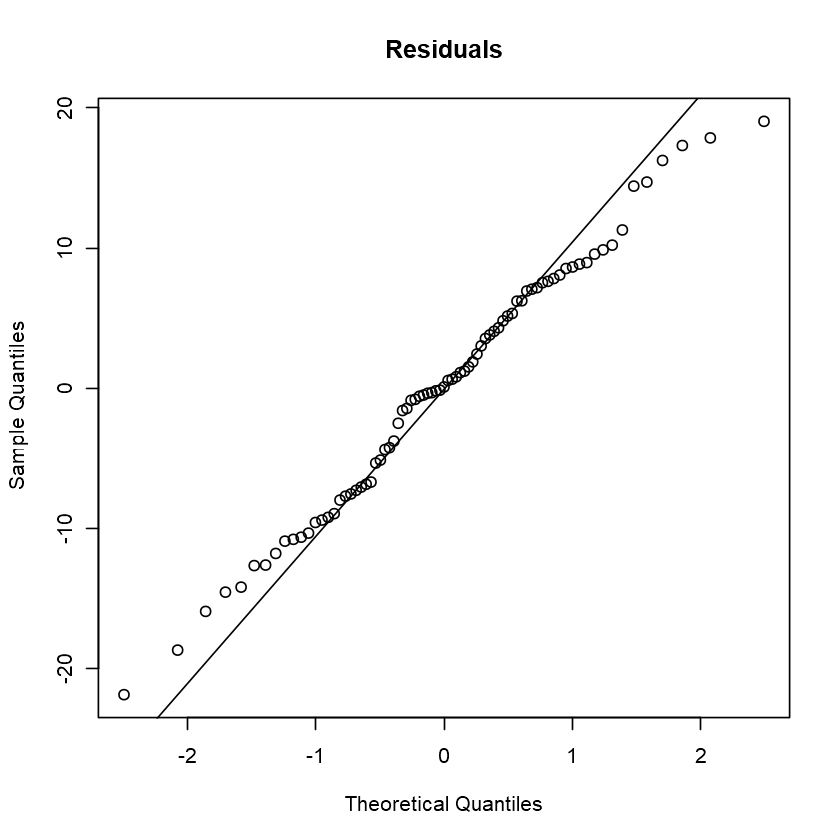

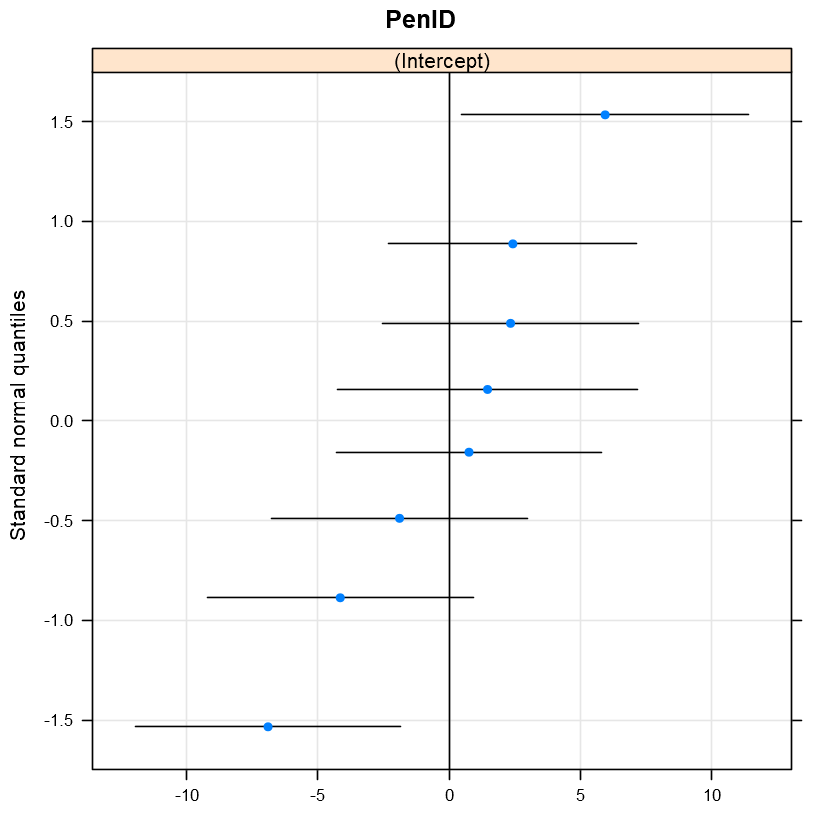

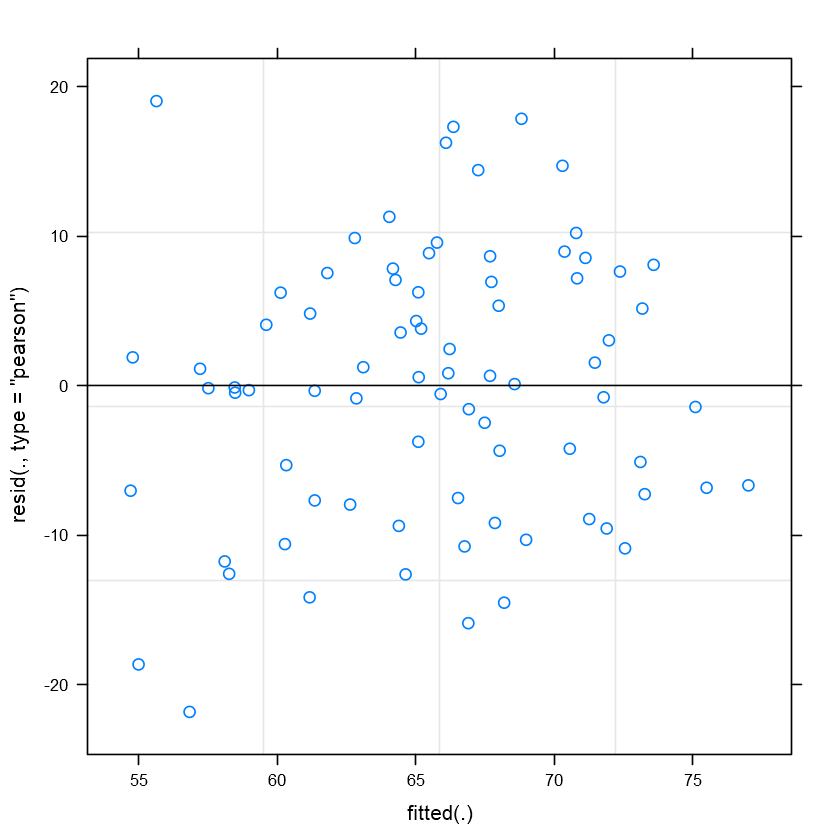

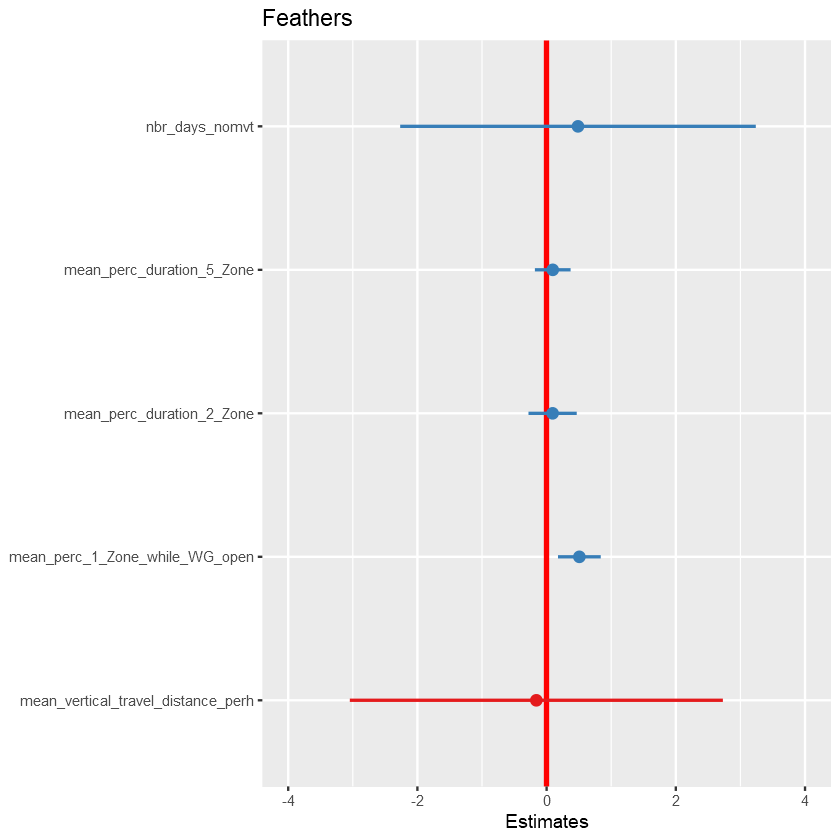

In [64]:
#For model PLOT in poster
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
#for predictive plot in poster
fit = lmerTest::lmer(Feathers ~ nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df)
fit_feather = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [35]:
tab_model(fit, file=file.path(path_,'LMERFeather.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERFeather.html'), file.path(path_,'LMERFeather.png'), zoom=3, cliprect = c(0, 5, 600, 270))

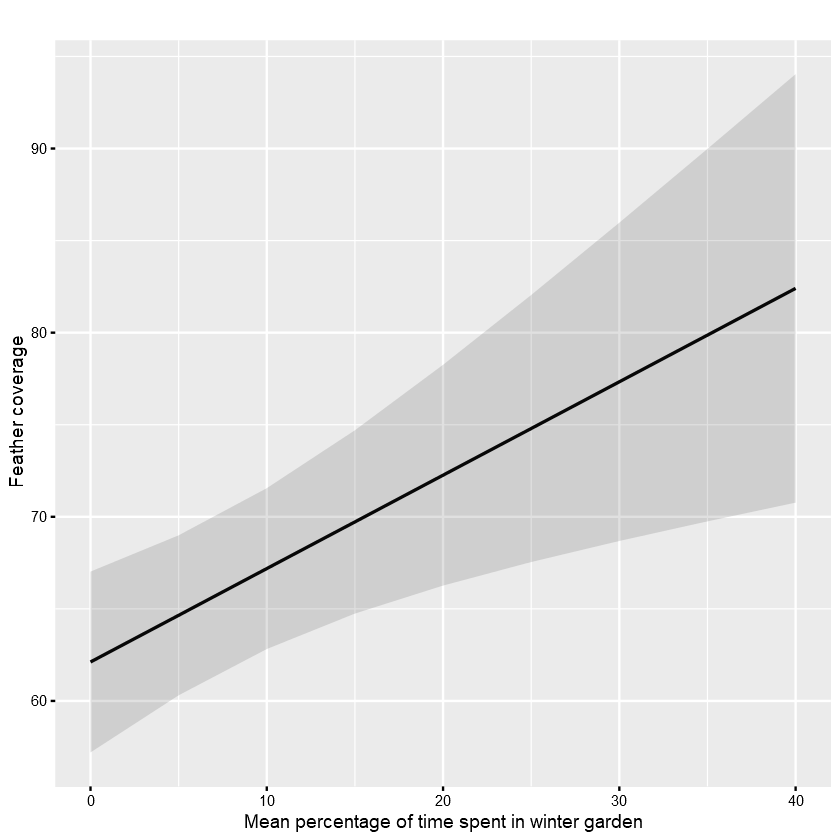

In [36]:
sjPlot::plot_model(fit, type = "pred", terms = c("mean_perc_1_Zone_while_WG_open"), title='')+ xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Feather_WG_pred.png'), width=4, height=4, bg = "transparent")

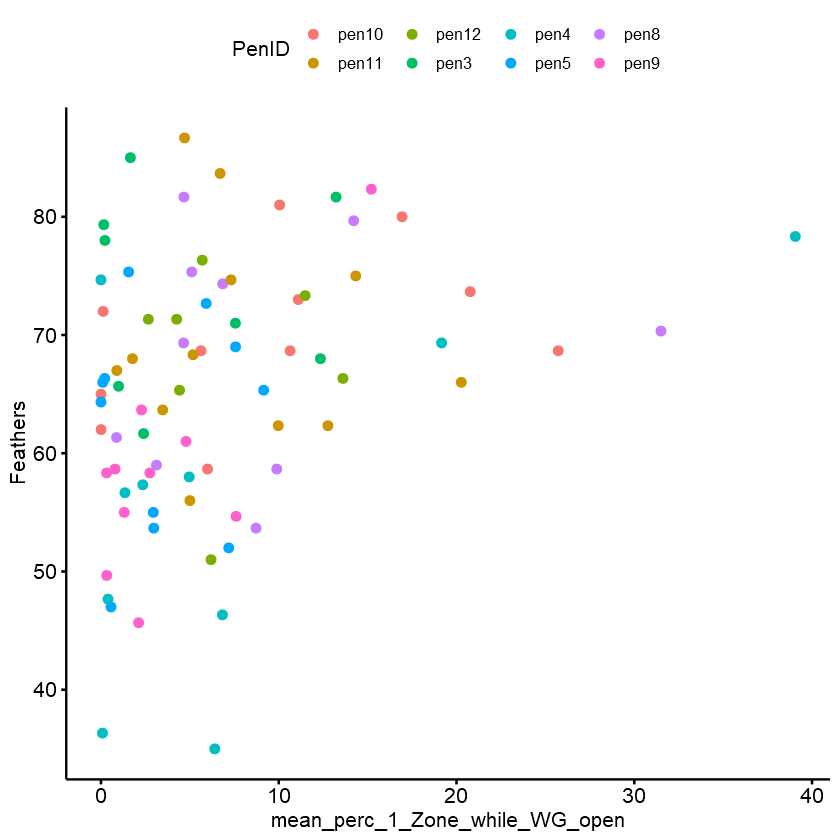

In [37]:
ggscatter(df, x = "mean_perc_1_Zone_while_WG_open", y = "Feathers",color = "PenID")
ggsave(file.path(path_,'Feather_WG_scatter.png'),width=5, height=5)

p1 = sjPlot::plot_model(fit, type = "pred", terms = c("mean_perc_duration_3_Zone"), title='')+xlab("Mean percentage of time spent in Lower perch")+ylab('Feather coverage')+ylab('Feather coverage') +
      theme(plot.background = element_rect(fill = "transparent",colour = NA), 
            axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p2 = sjPlot::plot_model(fit, type = "pred", terms = c("nbr_days_4zonevisited"), title='')+ xlab("Number of the first 3 days with 4 zone visited")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
            axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p3 = sjPlot::plot_model(fit, type = "pred", terms = c("mean_percentage_time_outside_while_WG_open"), title='')+ xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))+ ylim(75, 100)

p = plot_grid(p3,p2,p1, ncol=3, nrow=1)
title = ggdraw() + draw_label("Predicted Value of Feather Coverage (higher values indicate more feathers present) from LMER", fontface='bold')
plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1)) # rel_heights values control title margins

ggsave(file.path(path_adapt,'PRED_Feather_ALL.png'),width=12, height=4, bg = "transparent")

## Severity HA5

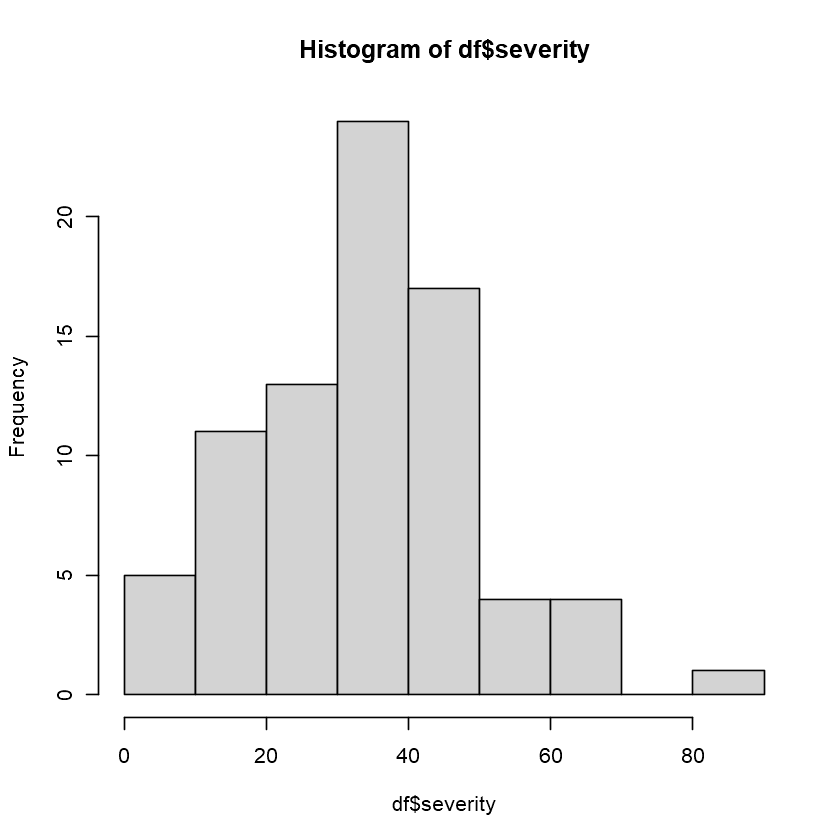

In [38]:
hist(df$severity)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_days_nomvt,475.7682112,475.7682112,1,72.73812,2.0353466282,0.1579575
mean_perc_duration_5_Zone,0.1912686,0.1912686,1,72.44408,0.0008182511,0.9772582
mean_perc_duration_2_Zone,59.4797724,59.4797724,1,72.99800,0.2544557439,0.6154743
mean_perc_1_Zone_while_WG_open,6.4153218,6.4153218,1,72.63880,0.0274448844,0.8688808
mean_vertical_travel_distance_perh,186.2353393,186.2353393,1,72.58083,0.7967187823,0.3750261


(Intercept)                     nbr_days_nomvt 
                       36.32997127                         3.11679526 
         mean_perc_duration_5_Zone          mean_perc_duration_2_Zone 
                        0.00629206                         0.14889872 
    mean_perc_1_Zone_while_WG_open mean_vertical_travel_distance_perh 
                       -0.04359205                        -2.01000460

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
severity ~ nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_2_Zone +  
    mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh +  
    (1 | PenID)
   Data: df

REML criterion at convergence: 645.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.94004 -0.63570 -0.01713  0.52656  2.92203 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   6.971   2.64   
 Residual             233.753  15.29   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
                                    Estimate Std. Error        df t value
(Intercept)                        36.329971  21.088664 72.954122   1.723
nbr_days_nomvt                      3.116795   2.184686 72.738119   1.427
mean_perc_duration_5_Zone           0.006292   0.219963 72.444079   0.029
mean_perc_duration_2_Zone           0.148899   0.295179 72.997997   0.504
mean

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


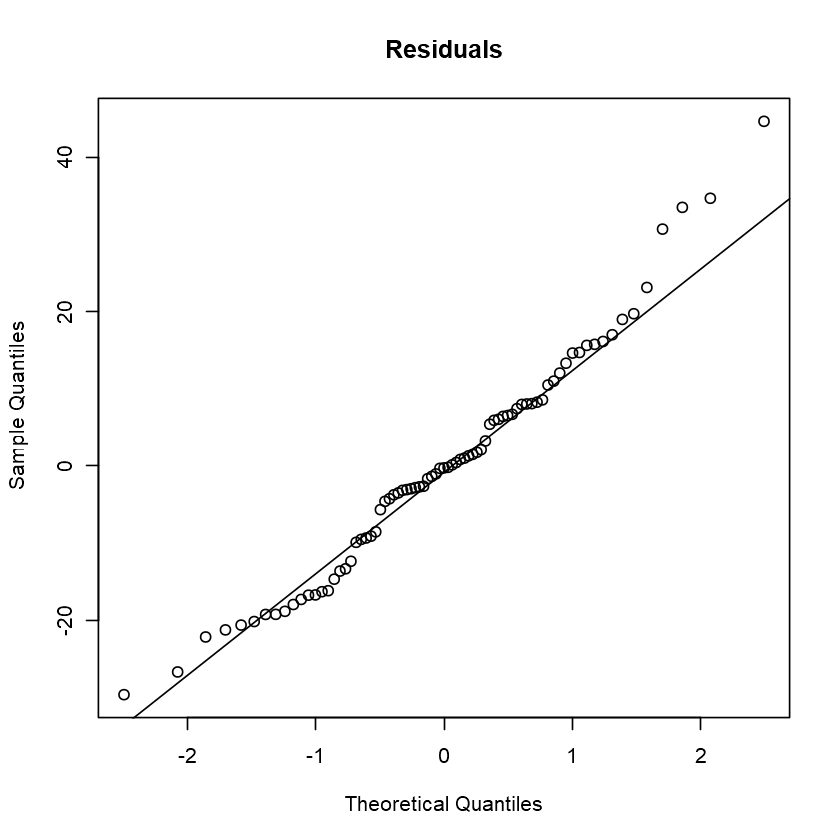

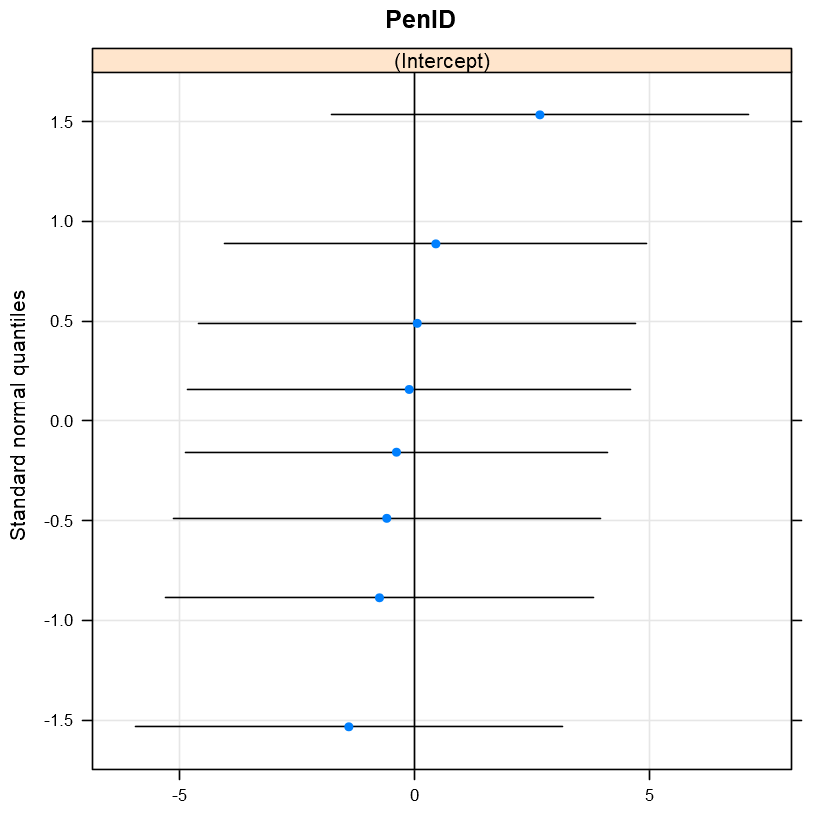

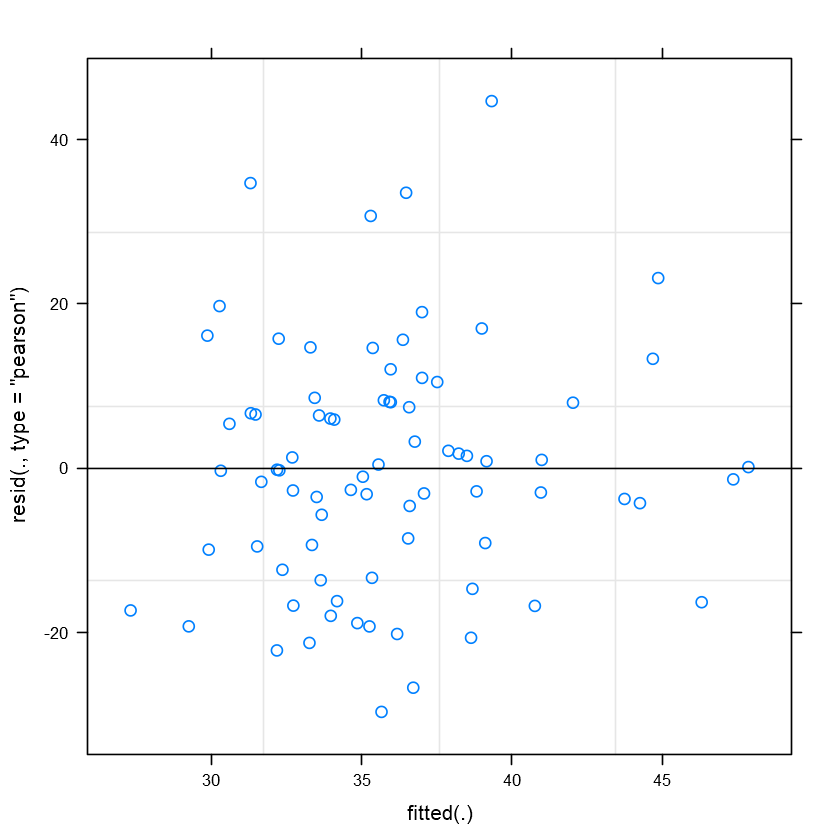

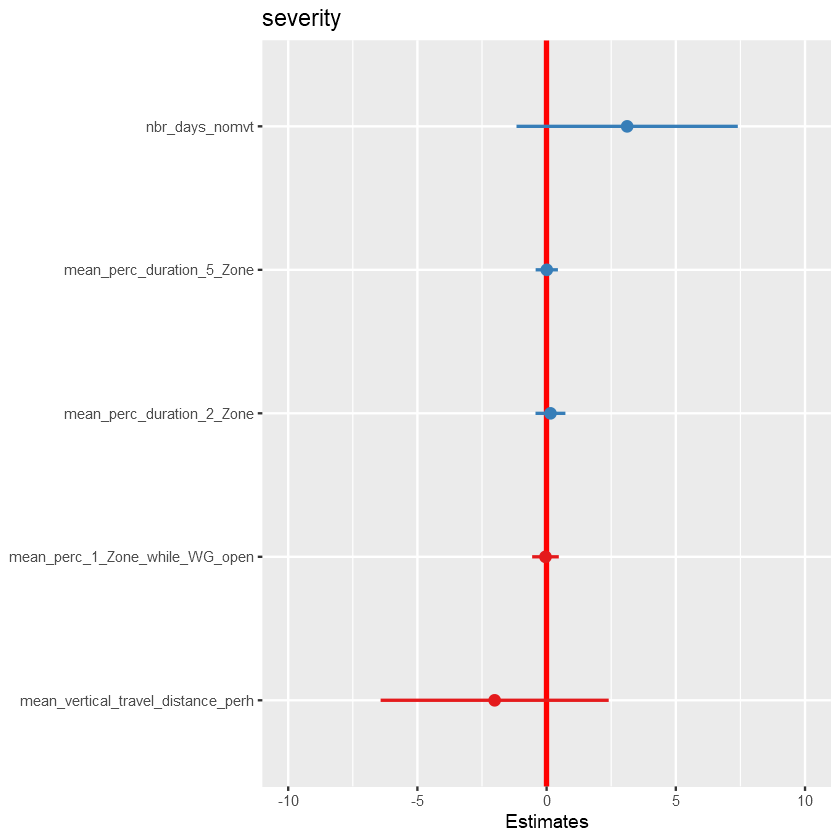

In [39]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit = lmerTest::lmer(severity ~  nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df)
fit_severity = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [11]:
tab_model(fit, file=file.path(path_,'LMERSEVERITY.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERSEVERITY.html'), file.path(path_,'LMERSEVERITY.png'), zoom=3, cliprect = c(0, 5, 600, 270))

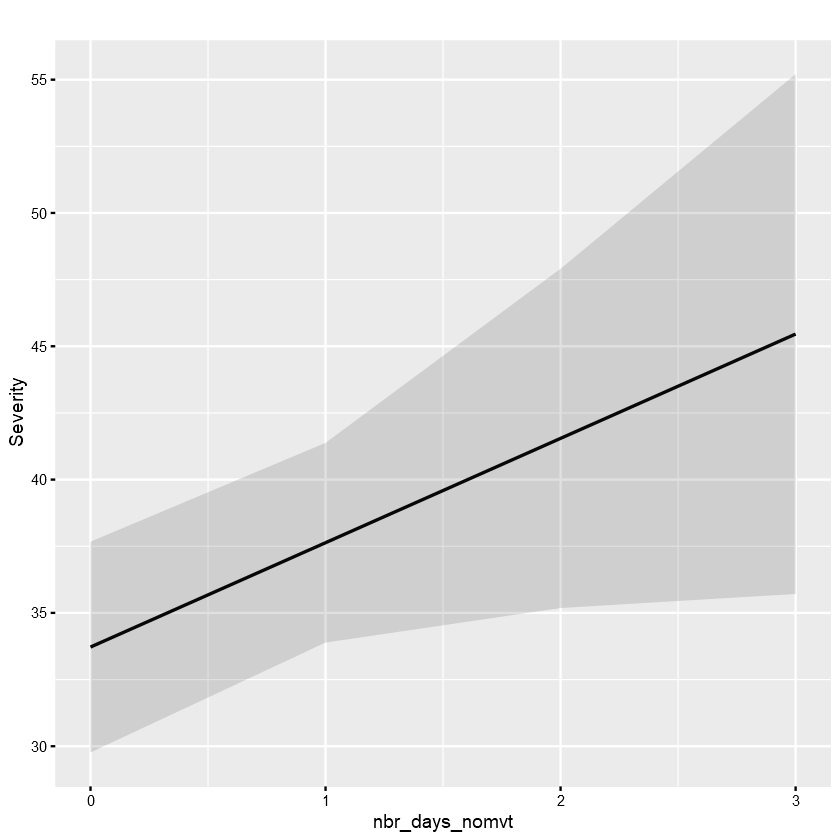

In [12]:
sjPlot::plot_model(fit, type = "pred", terms = c("nbr_days_nomvt"), title='')+ xlab("nbr_days_nomvt")+ylab('Severity')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Severity_nbr_days_nomvt_pred.png'), width=4, height=4, bg = "transparent")

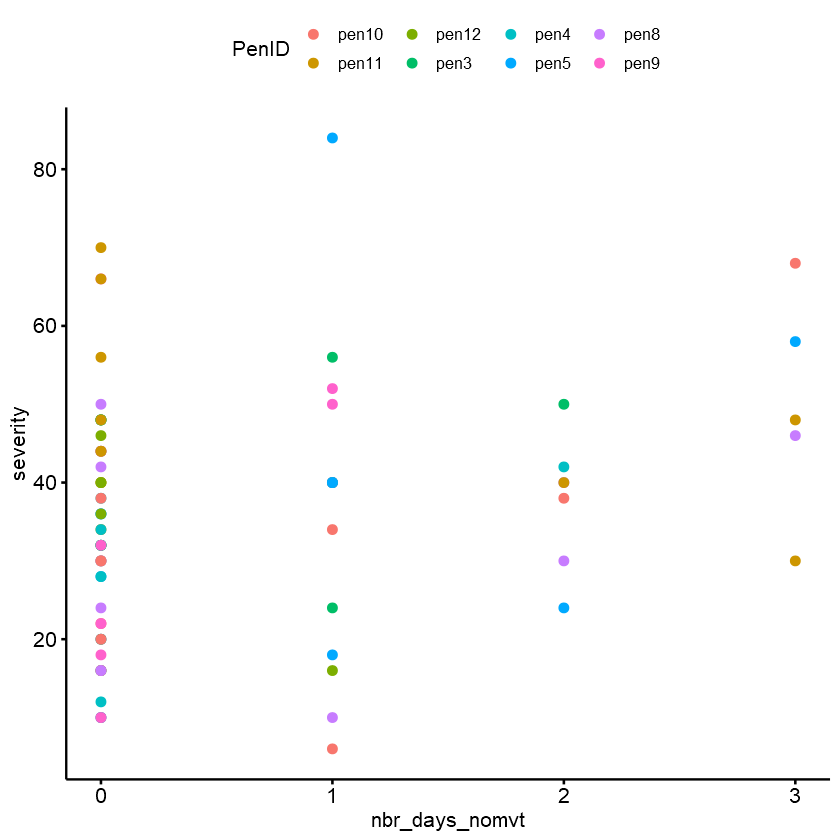

In [13]:
ggscatter(df, x = "nbr_days_nomvt", y = "severity",color = "PenID")
ggsave(file.path(path_,'Severity_nbr_days_nomvt_scatter.png'),width=5, height=5)

# Weight

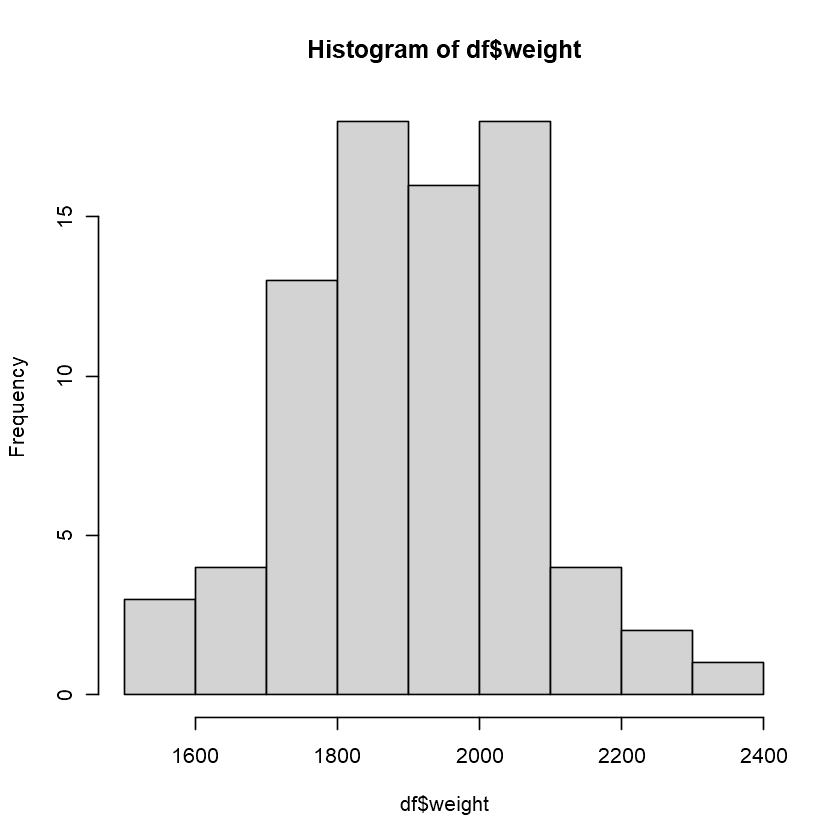

In [14]:
hist(df$weight)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_days_nomvt,125588.5137,125588.5137,1,72.91308,5.36836529,0.02331686
mean_perc_duration_5_Zone,944.5363,944.5363,1,72.64919,0.04037484,0.84131096
mean_perc_duration_2_Zone,6324.4771,6324.4771,1,72.85961,0.27034402,0.60467732
mean_perc_1_Zone_while_WG_open,54575.3474,54575.3474,1,72.85530,2.33285984,0.13099904
mean_vertical_travel_distance_perh,33694.2259,33694.2259,1,71.90671,1.44028230,0.23403271


(Intercept)                     nbr_days_nomvt 
                      2084.1104251                        -50.3529654 
         mean_perc_duration_5_Zone          mean_perc_duration_2_Zone 
                         0.4399655                         -1.5244995 
    mean_perc_1_Zone_while_WG_open mean_vertical_travel_distance_perh 
                        -3.9988557                        -26.7962847

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
weight ~ nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_2_Zone +  
    mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh +  
    (1 | PenID)
   Data: df

REML criterion at convergence: 980.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4181 -0.6918  0.1450  0.6114  1.8145 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)   266.8   16.33  
 Residual             23394.2  152.95  
Number of obs: 79, groups:  PenID, 8

Fixed effects:
                                   Estimate Std. Error       df t value
(Intercept)                        2084.110    209.622   73.000   9.942
nbr_days_nomvt                      -50.353     21.732   72.913  -2.317
mean_perc_duration_5_Zone             0.440      2.190   72.649   0.201
mean_perc_duration_2_Zone            -1.524      2.932   72.860  -0.520
mean_perc_1_Zone_while_WG_

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


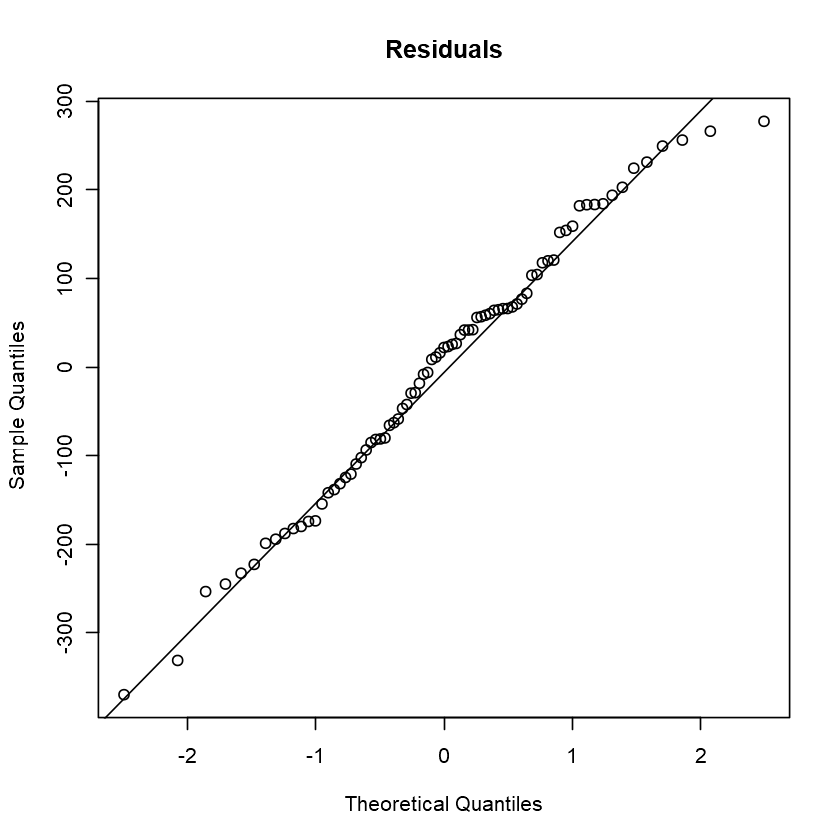

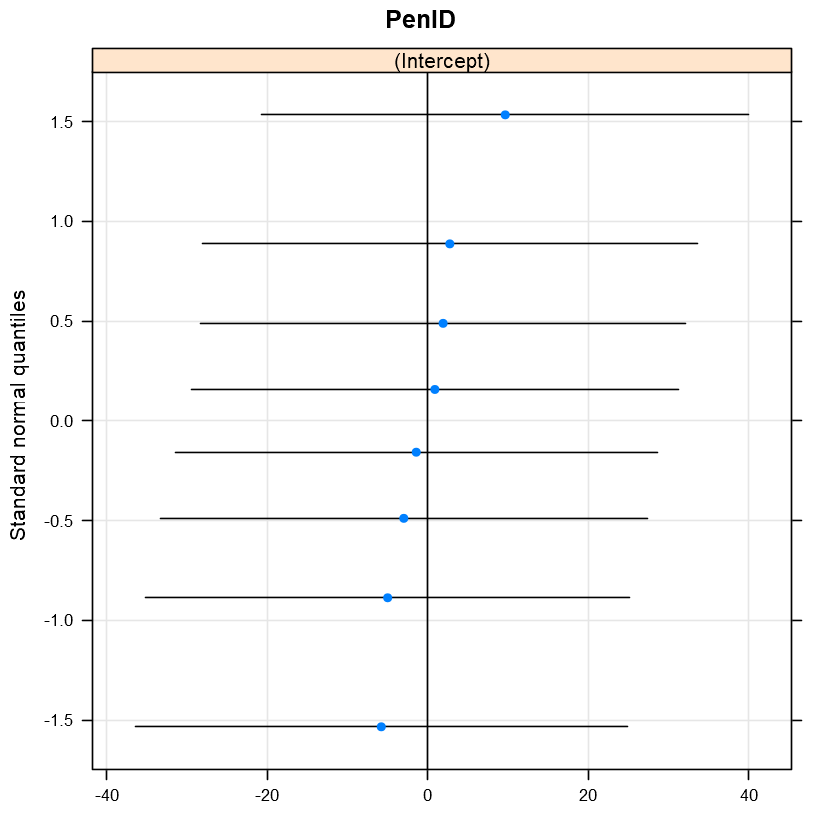

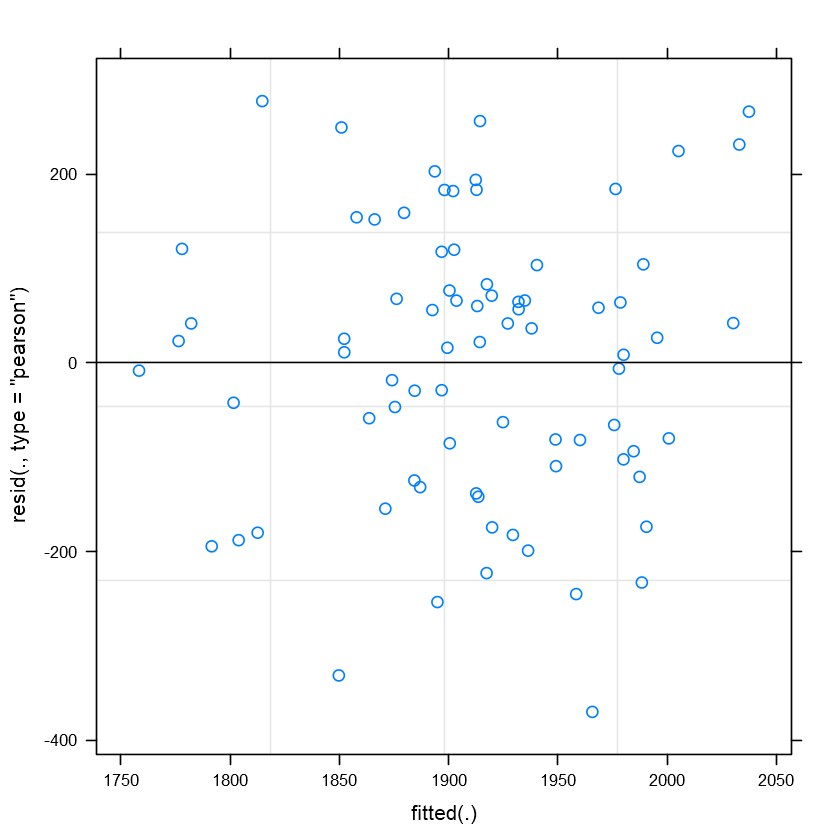

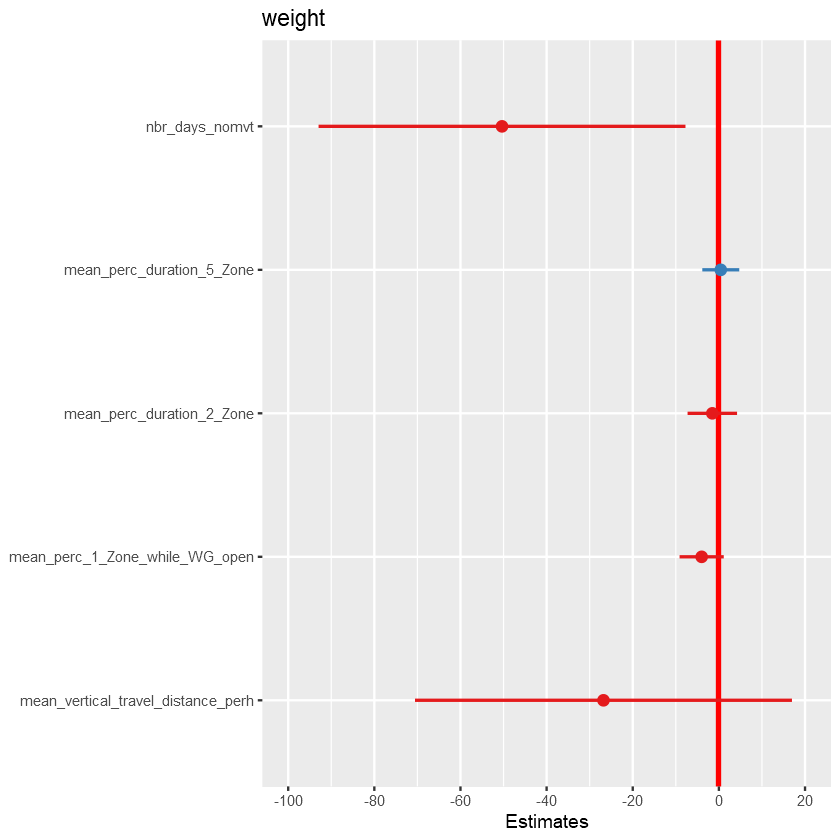

In [40]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit = lmerTest::lmer(weight ~ nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df)
fit_weight = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [41]:
tab_model(fit, file=file.path(path_,'LMERWEIGHT.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERWEIGHT.html'), file.path(path_,'LMERWEIGHT.png'), zoom=3, cliprect = c(0, 5, 600, 270))

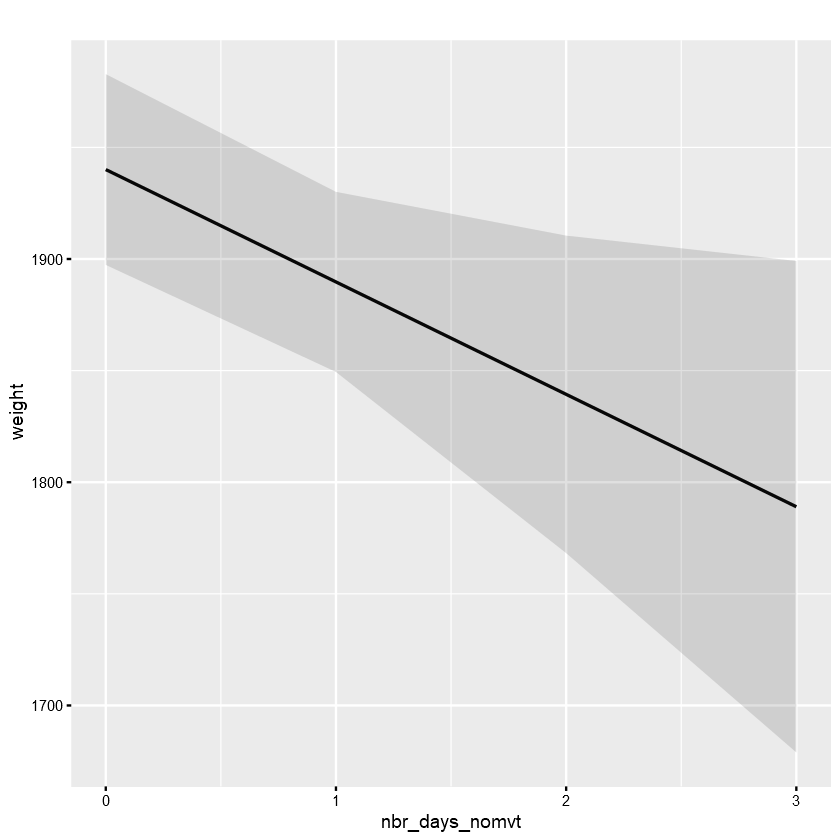

In [42]:
sjPlot::plot_model(fit, type = "pred", terms = c("nbr_days_nomvt"), title='')+ #xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Weight_nbr_days_nomvt.png'), width=4, height=4, bg = "transparent")

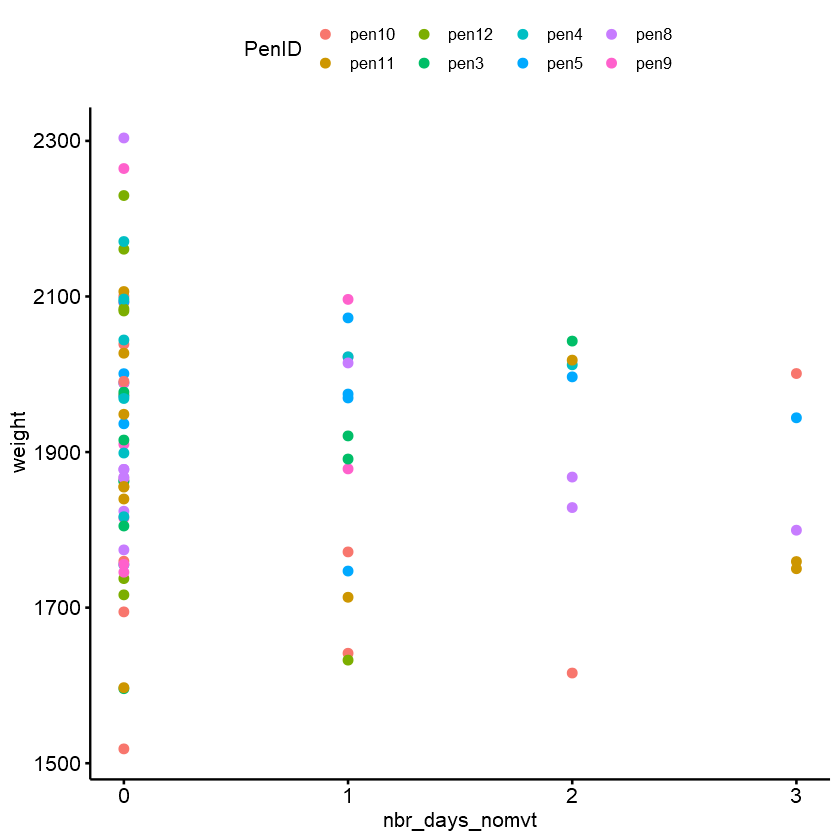

In [44]:
ggscatter(df, x = "nbr_days_nomvt", y = "weight",color = "PenID")
ggsave(file.path(path_,'Weight_nbr_days_nomvt.png'),width=5, height=5)

# max pododermatitis within HA1-HA5

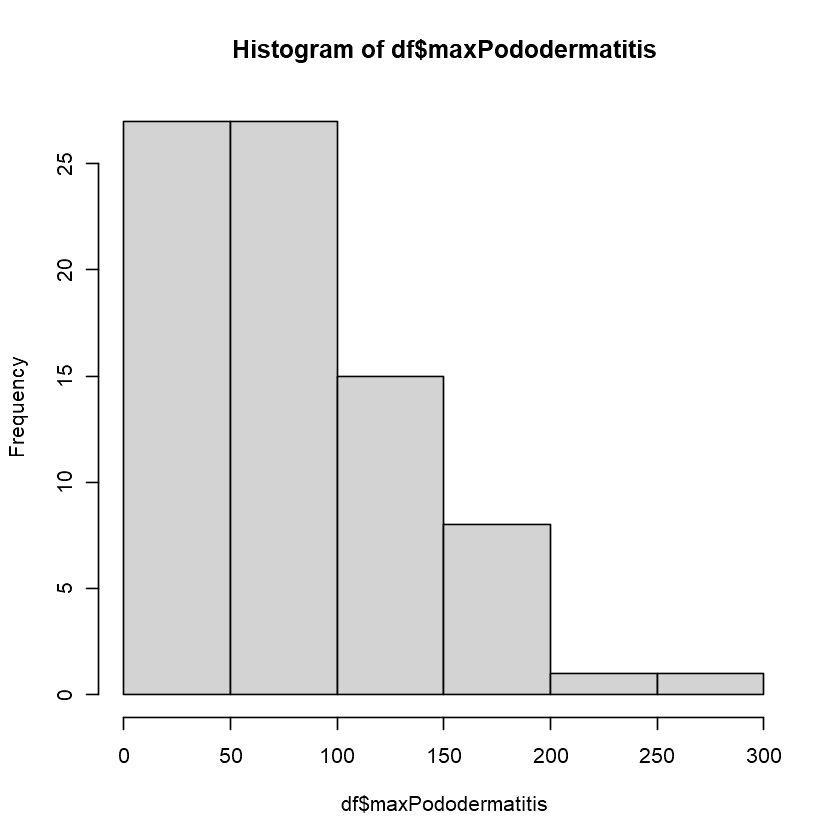

In [45]:
hist(df$maxPododermatitis)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
nbr_days_nomvt,0.1160767,0.1160767,1,72.52589,3.276033e-05,0.9954489
mean_perc_duration_5_Zone,5143.8157354,5143.8157354,1,72.00785,1.451739e+00,0.2321941
mean_perc_duration_2_Zone,3.7639192,3.7639192,1,72.99457,1.062291e-03,0.9740883
mean_perc_1_Zone_while_WG_open,157.4994596,157.4994596,1,72.34892,4.445108e-02,0.8336093
mean_vertical_travel_distance_perh,1369.2938580,1369.2938580,1,72.28262,3.864559e-01,0.5361241


(Intercept)                     nbr_days_nomvt 
                       32.70879221                        -0.04869152 
         mean_perc_duration_5_Zone          mean_perc_duration_2_Zone 
                        1.03199011                         0.03746396 
    mean_perc_1_Zone_while_WG_open mean_vertical_travel_distance_perh 
                       -0.21602531                         5.45163370

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: maxPododermatitis ~ nbr_days_nomvt + mean_perc_duration_5_Zone +  
    mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open +  
    mean_vertical_travel_distance_perh + (1 | PenID)
   Data: df

REML criterion at convergence: 844.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.74227 -0.63716 -0.09083  0.52901  2.69280 

Random effects:
 Groups   Name        Variance Std.Dev.
 PenID    (Intercept)  107.8   10.38   
 Residual             3543.2   59.52   
Number of obs: 79, groups:  PenID, 8

Fixed effects:
                                   Estimate Std. Error       df t value
(Intercept)                        32.70879   82.12021 72.91456   0.398
nbr_days_nomvt                     -0.04869    8.50706 72.52589  -0.006
mean_perc_duration_5_Zone           1.03199    0.85651 72.00785   1.205
mean_perc_duration_2_Zone           0.03746    1.14945 72.99457   0.033
mean_p

Warning message in ranef.merMod(fit, postVar = TRUE):
"'postVar' is deprecated: please use 'condVar' instead"


$PenID


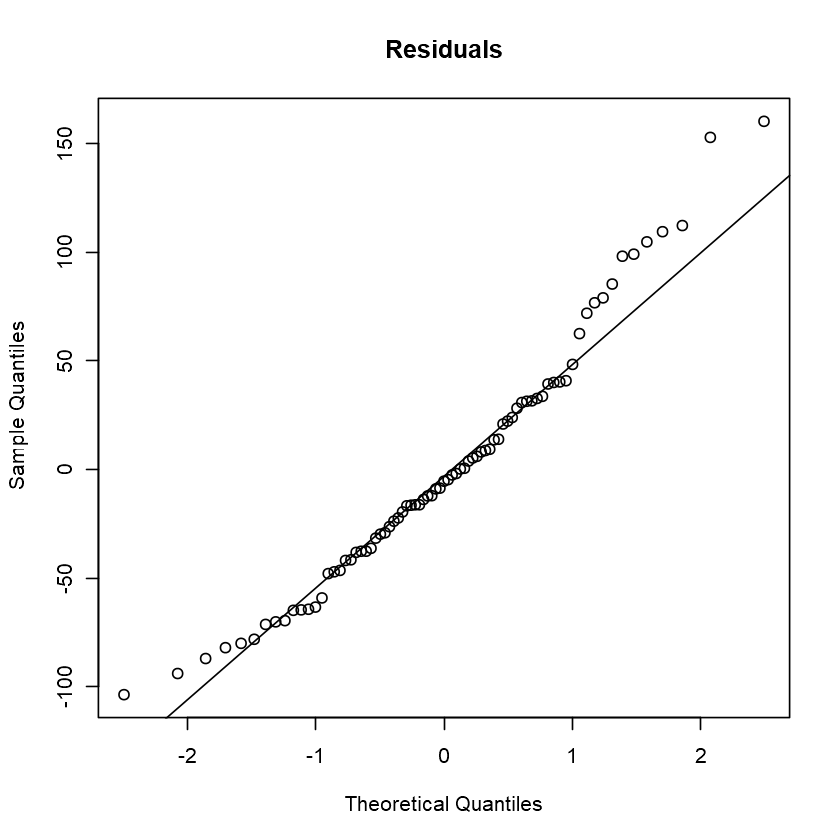

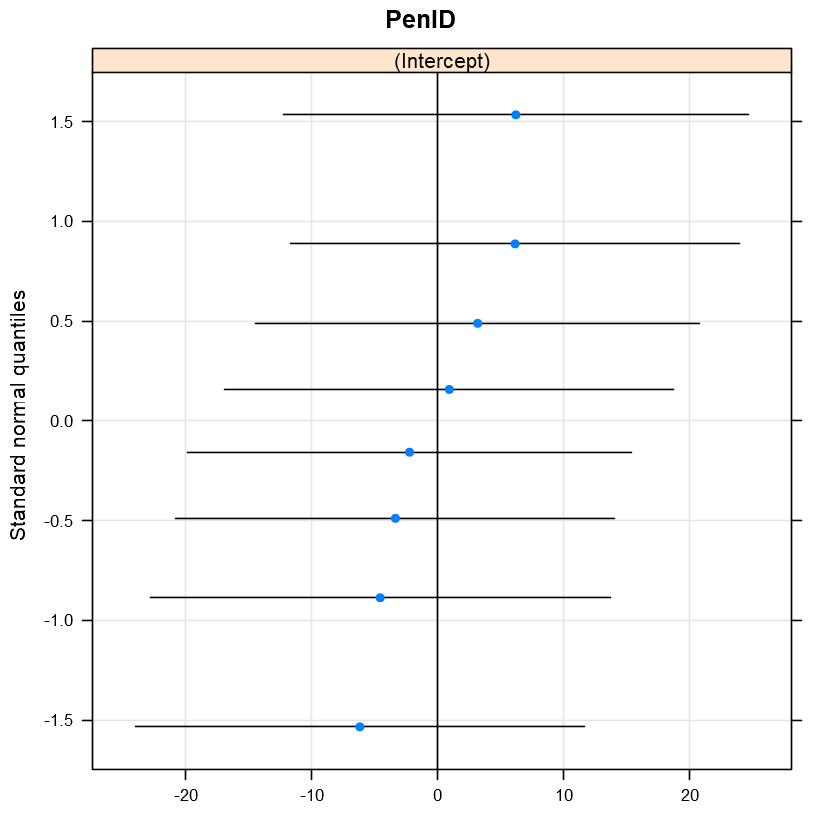

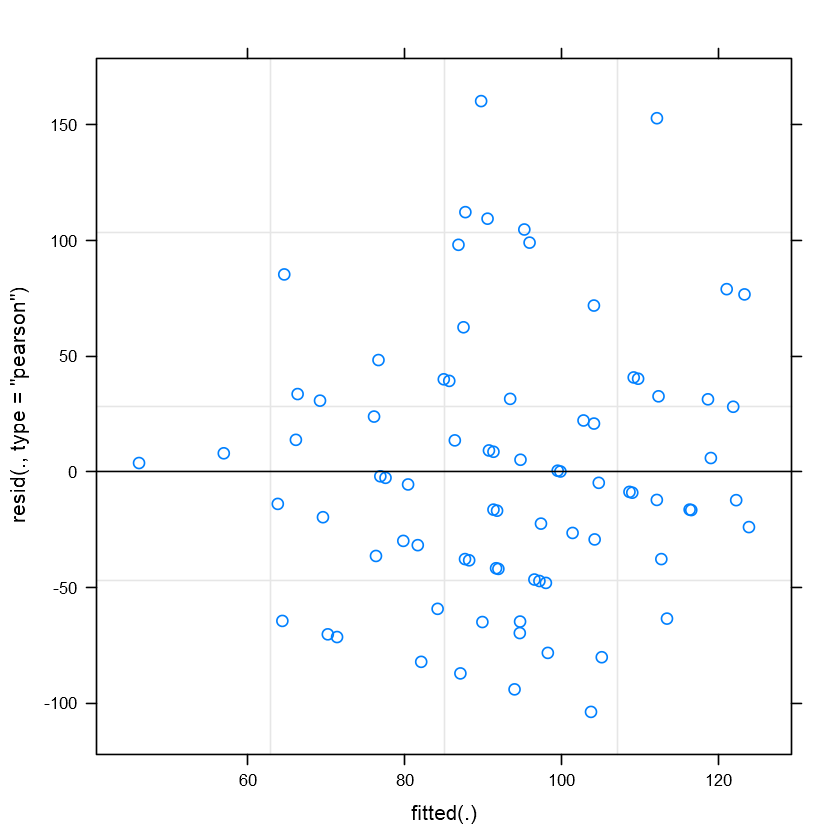

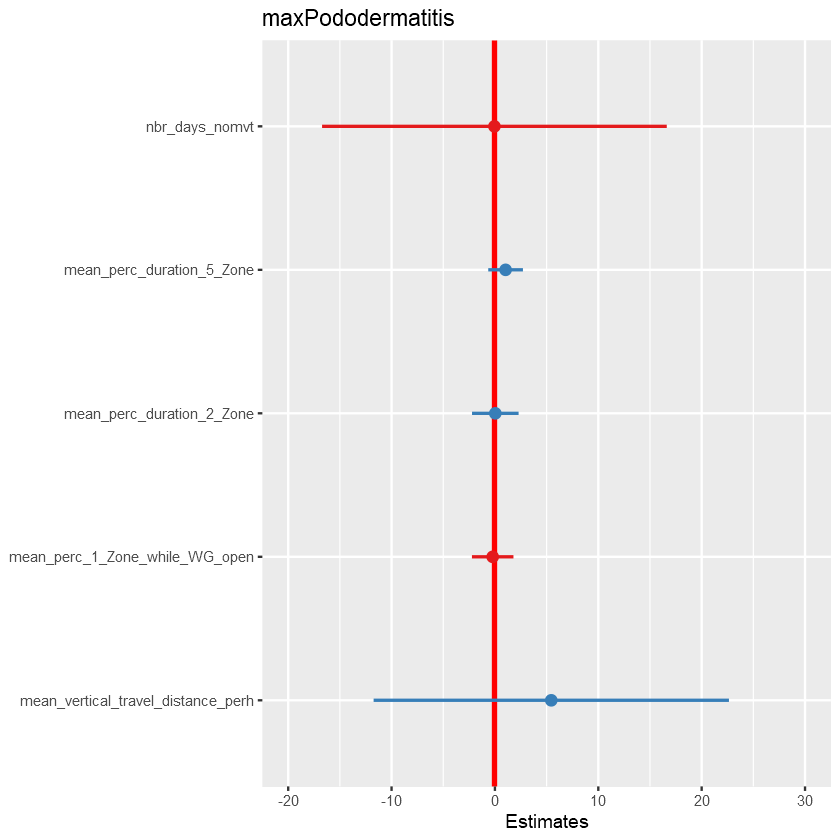

In [60]:
#only two groups so treatment as fixed effect (otherwise (1|Treatment/PenID) lead to boundary (singular) fit: see ?isSingular)
fit = lmerTest::lmer(maxPododermatitis ~ nbr_days_nomvt + mean_perc_duration_5_Zone + mean_perc_duration_2_Zone + mean_perc_1_Zone_while_WG_open + mean_vertical_travel_distance_perh + (1|PenID), 
           data=df)
fit_podo = fit
anova(fit)
effCoef(fit)

#capture.output(summary(fit), file=file.path(path_,paste(name,'.txt', sep='')), append=TRUE)
summary(fit)
#Assumptions
###### normally distributed residuals
#qqmath(fit, id=0.05)
qqnorm(resid(fit), main = "Residuals")
qqline(resid(fit))
###### normally of random effects
qqmath(ranef(fit,postVar = TRUE))
######check homogeneity of variance (residuals has constant variance)
#variance of the residuals is equal across groups. Even spread around the centered line?
plot(fit)

#plot estimates
plot_model(fit, vline.color = "red")

In [47]:
tab_model(fit, file=file.path(path_,'LMERPodo.html'))
# then take this html file and make .png file
webshot(file.path(path_,'LMERPodo.html'), file.path(path_,'LMERPodo.png'), zoom=3, cliprect = c(0, 5, 600, 270))

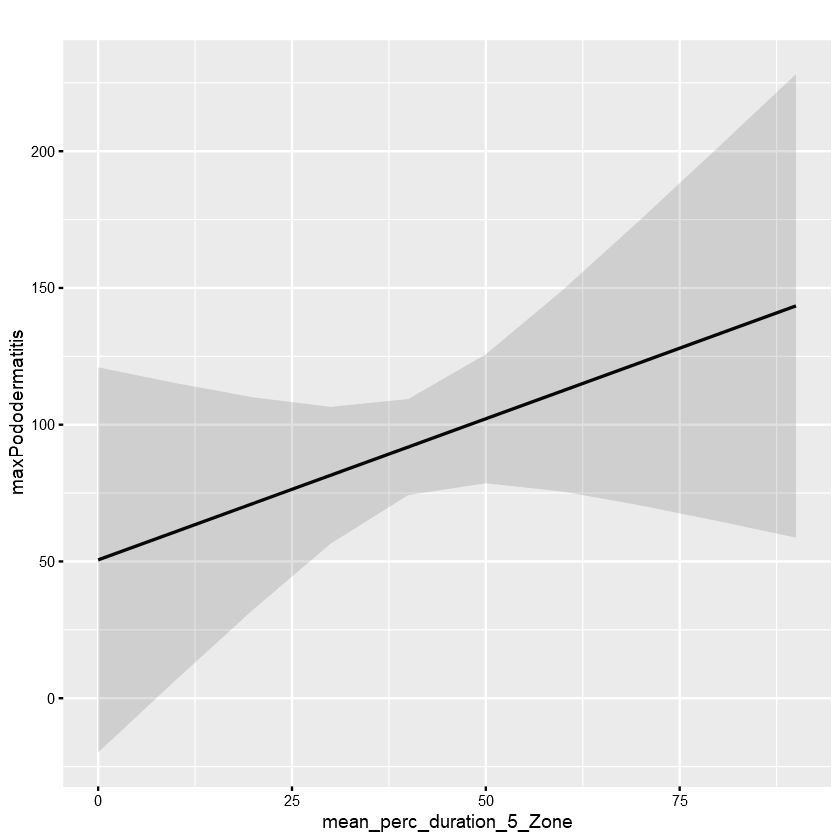

In [48]:
sjPlot::plot_model(fit, type = "pred", terms = c("mean_perc_duration_5_Zone"), title='')+ #xlab("Mean percentage of time spent in winter garden")+ylab('Feather coverage')+
      theme(plot.background = element_rect(fill = "transparent",colour = NA),
           axis.text.x = element_text(color="black"), axis.ticks = element_line(color = "black"),
           axis.text.y = element_text(color="black"))
ggsave(file.path(path_,'Podo_mean_perc_duration_5_Zone_pred.png'), width=4, height=4, bg = "transparent")

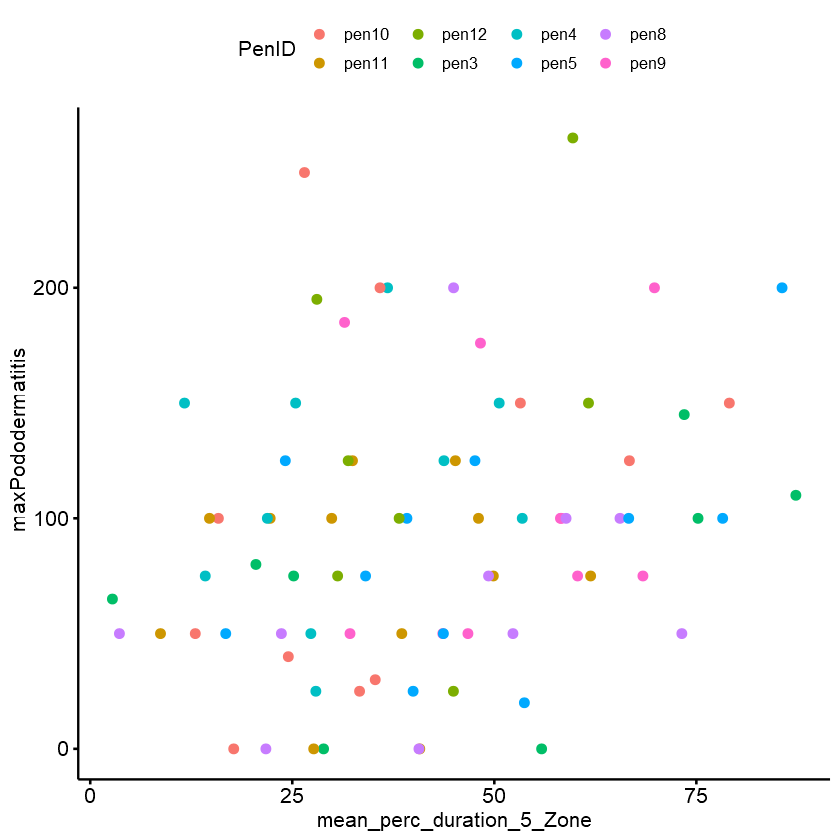

In [49]:
ggscatter(df, x = "mean_perc_duration_5_Zone", y = "maxPododermatitis",color = "PenID")
ggsave(file.path(path_,'Podo_mean_perc_duration_5_Zone_scatter.png'),width=5, height=5)

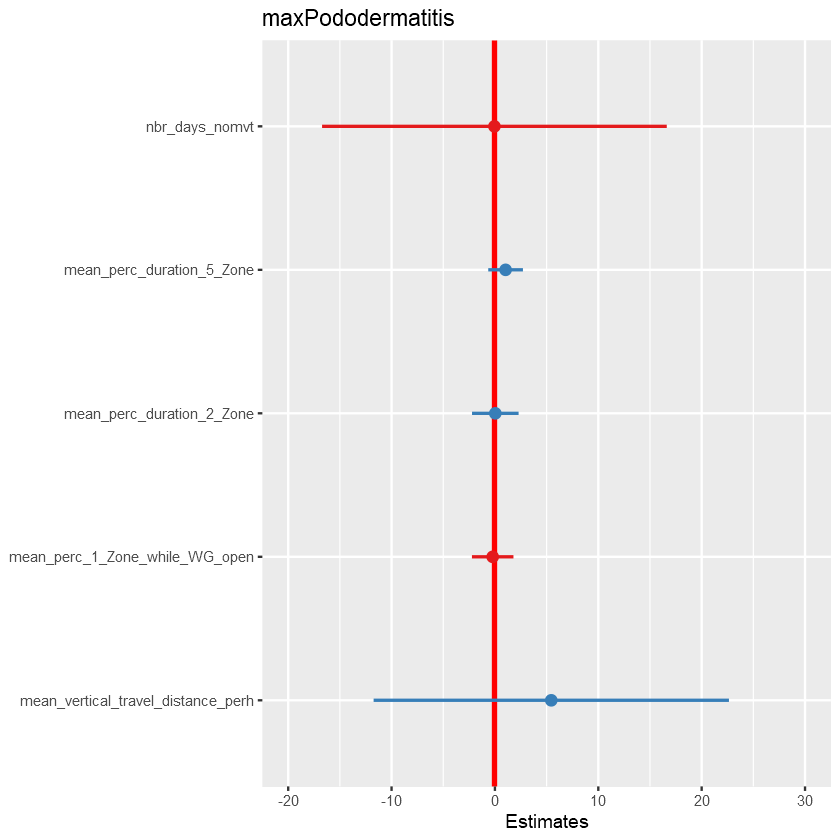

In [50]:
#plot estimates
plot_models(fit, vline.color = "red")

In [56]:
#plot estimates
#plot_models(fit_feather, fit_severity, fit_weight, fit_podo, vline.color = "red")